In [2]:
import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets, transforms


In [37]:
# Download and load the training set
train_dataset = datasets.MNIST(root='/home/zach/intelligent_machines/data', train=True, download=False)
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()

test_dataset = datasets.MNIST(root='/home/zach/intelligent_machines/data', train=False, download=False)
test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

print(train_images.shape)
print(train_labels.shape)


print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [38]:
train_images = train_images[:32,:,:]
train_labels = train_labels[:32,:,:]

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

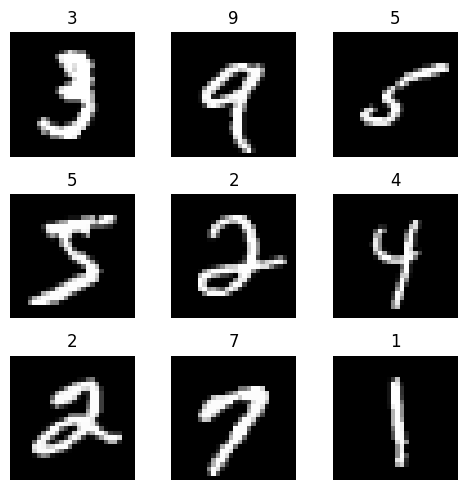

In [39]:

def show_random_image_grid(images, labels, nrow=3, ncol=3):
    num_images = len(images)
    num_samples = min(nrow * ncol, num_images)
    
    random_indices = np.random.choice(num_images, num_samples, replace=False)
    
    fig, axes = plt.subplots(nrow, ncol, figsize=(5, 5))
    axes = axes.flatten()
    
    for i, ax in enumerate(axes[:num_samples]):
        img = images[random_indices[i]]
        label = labels[random_indices[i]]
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f'{label.item()}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display the grid with random images
show_random_image_grid(train_images, train_labels)


In [5]:
print(train_labels[40:80])

[1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6 3 0 2
 1 1 7]


In [13]:
def softmax(logits):
    """ 
    Scales values to between 0-1. Largest value takes majority of weight but not all (softmax). Sensativity is exponential (e^x)
    Input: (Batch, N)
    Output: (Batch, N)
    """

    C = np.max(logits, axis=1, keepdims=True)
    logits_scaled = logits - C
    exp = np.exp(logits_scaled)
    exp_total = np.sum(exp, axis=1, keepdims=True)
    exp /= exp_total

    return exp

In [42]:
n_train, W, H = train_images.shape

batch_size = 1
shuffled_index = np.random.permutation(n_train)  # Shuffle all indices
curr_index = 0

[ 1 12 15  5  8 22 11 18  3 27 20 31  6 24 14 25 30 26 19  7  2 23 10 29
 17 16 28  9 13 21  4  0]


In [30]:
lr = 0.1

In [14]:
W1 = np.random.normal(size=(W*H,10), scale=0.0001)


In [32]:
logs = dict()

logs['iter'] = []
logs['loss'] = []

curr_iter = 0

In [41]:

for i in range(10):

    curr_iter += 1

    # Get batch of data

    batch = train_images[shuffled_index[curr_index:curr_index+batch_size]]
    batch_label = train_labels[shuffled_index[curr_index:curr_index+batch_size]]
    batch = batch.reshape(batch_size,-1)
    curr_index += batch_size

    # Make prediction

    y1 = batch @ W1

    print(y1.shape)

    # Calc Loss

    # -- hard max -- 
    # action_pred = np.argmax(y1, axis=1)
    # action_correct = batch_label
    # error = action_pred-action_correct
    # reward = np.ones_like(error) * -1
    # reward[error == 0] = 1

    # soft max
    probs = softmax(y1)
    loss = -1 * np.log(probs[:,batch_label])
    loss = np.average(loss) #average accross batch

    W1_grad = 1
    W1 =  W1 - W1_grad * lr


    logs['loss'].append(loss)
    logs['iter'].append(curr_iter)

    # Adjust Parameters...

    

    

(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)


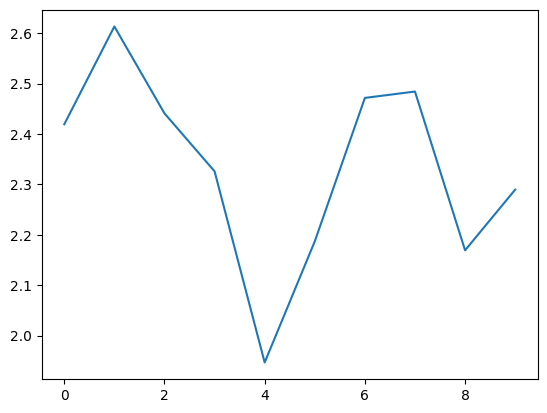

In [35]:
plt.plot(logs['loss'])
plt.show()

Softmax learning is wayyyy faster than just max learning.
 
- with max learning I make a single prediction and then the information of all the other predictions is not kept...

In a sense this is why classification is much easier. If we know the correct thing, than we 100% know that it's not all of the other things. But in RL, you don't nesseacirly know it's not those other things...

For every single classification predictionme of I make, I can improve all of the other weights. Reminds me a bit of constrastive learning... I know that if its an 5 then its not a 4,3,2,1,6,7,8,9...

Very powerful idea to squeeze more out of the data...

If I take an action in RL and I get a reward. then I know thats good. 

Classification has 10x more data and information. You learn about what to do and not to do all at the same time for a given scenario. 

If the action is not like classification, then you basically need to test out each action in that state to learn something about it... of course we do not do this though, it's impossible.. we blend together states, we generalize...

Very related to this idea of distillation. There is so much information not just in what it is. but also in what it could also be, or what it is not...

Optimization...

- Can you optimise without a function?
- Change is possible... in random directions. Optimization, change in a particular direction that we say is good
- We have some type of metric... and we want to get better at it.
- Multi-variable optimization... this is ok actually. 
- Multi-variable - single metric optimization, this is ok. This is most of machine learning
- Multi-metric optimization (how to combine the metrics? weighted average safe bet and quite good) stiffness, weight, cost, aesthetic, etc.. how to balance? This is most engineering problems! Pareto Curve

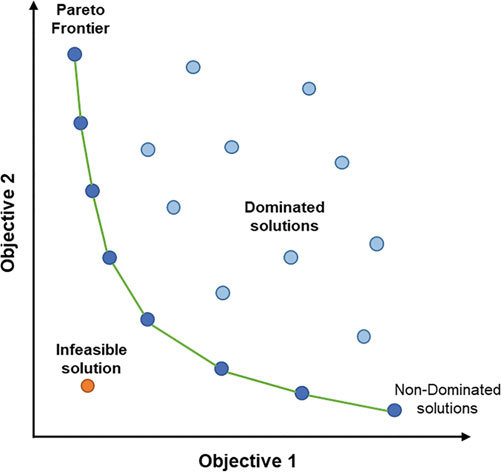

Ways to optimize....

- Generally we need a starting point
- and then we want to improve
- Directly calculate the minium of an function
    - Volume of cube, surface area, etc.. most of these functions you can directly calculated the min/max


- hill climbing algortihims
- random search
    - make a random permutation and evaluate it's result, if its lower keep it as the new best solution. Make another completely random permutation
- grid search
 - go through all posibilties in systamtic way



- Genetic Algorithim


- Stationary vs moving targets. Noisy returns...
- If you do random search for example, and do each thing once, what if something you tried is usally good but just wasn't good that one time you did. What if the world is changing?
- Bayesian hyper parameter search... exploration vs explotation

Why can we not backprop hyper parmeters?

- what is the effect of learning rate on the loss?
- what is the effect of number of layers on the loss?
- It's in a system above...
- You kinda need to evaluate it...
- I can take out step adding more layers, or I can take one step with less layers... and I can approximate the local gradient...

- Multi-variable, so it's this huge, masssively huge volume... (curse of dimensinoality)

- The beutiful thing is how backprop can optimise these really large networks!

- The hopfield local rule, doesn't really work if you have multi layers. You can increase one weight for example, which may locally improve! but the next layer down is negatively effected.
- See how many permutations you would need to try to see how to actually improve...
- Backprop is nice beacuse you analytically calculate the change of 
- Given the current computational graph. "the gradient of this variable with respect to the loss is" x. Which basically tells you. how changing that variable will effect the loss. The only thing left to do is to actually change that variable in that direction...
- One challenge is that its a local rule... A global rule would be very hard to find. What if it's surronded by a moat? You would need to endure short term increases in loss!! that would truley be a remarkable algorithim...

Loss Landscape...

- Local Max/Mins
- Global Max/Mins

A good analogy is of mountains... 

differences? only 3D, fairly simple curvatures, mountains locally have lots of roughness.
Similarities? similar solutions in action space should have similar performance, so you would get a large hole/peak in an area...

- Moutain and Valleys. You want to pull the surface in both directions!

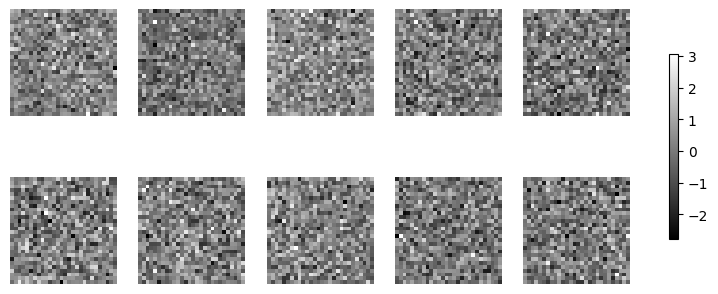

In [47]:

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    img = W1[:, i].reshape(W, H)  # Reshape into an image
    im = ax.imshow(img, cmap='gray')
    ax.axis('off')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
plt.show()

Classifcation, viewed as single step RL with immediate feedback has an interesting action distribution. All the weight is on a single correct action, and it's zero everywhere else. 

If you take the wrong action, you get a penalty... This basically is like Policy Gradient for a single step...